<a href="https://colab.research.google.com/github/shidsa6/Deutsch-Josza-project/blob/main/Exercise%208%20-%20Runge-Kutta%20methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Shidsa Pourbakhsh__
<br>
Date: Mar. 5, 2025
<br>
PHYS 2030 W25

__Rubric__ (100 points total):

- Part (a) - __20 points__

- Part (b) - __20 points__

- Part (c) - __20 points__

- Part (d) - __40 points__

# <center><font color=#46769B>Exercise 8: Runge-Kutta methods</font></center>

## <font color=#46769B>Introduction</font>

In Exercise 7, we considered an ideal simple pendulum consisting of a rigid rod of length $\ell$, with a mass at one end and a frictionless pivot at the other end, such that the pendulum is free to oscillate in the vertical plane under the influence of gravity, with gravitational acceleration $g$. The equation of motion is

$$\theta''(t) + \omega^2 \, \sin\theta(t) = 0 \qquad \qquad (1)$$

where $t$ is time, $\theta(t)$ is the angle of displacement from the vertical axis (where $\theta = 0$ corresponds to the pendulum oriented straight downward), and $\omega = \sqrt{g/\ell}$.

We solved the equation of motion numerically using Euler's method. We found that for small-angle displacements, our numerical solution agreed well with the simple harmonic oscillator solution, with period $T = 2\pi /\omega$, while for large-angle displacements the oscillations have a longer period.

While Euler's method is easy to implement for solving IVPs, but we saw that it had major shortcomings in terms of accuracy, requiring a large number of steps to achieve even a modest accuracy. Higher-order methods can overcome this difficulty, dramatically decreasing the number of steps needed.

The goal here to learn how to implement higher-order explicit methods, namely, RK2 methods (__midpoint method__ and __Heun's method__) and the __classic RK4 method__.

The goals of this exercise are:
- Gain experience with second-order (and higher) methods for solving ODEs

Required reading:
- *Lesson 8: Second-order methods*


## <font color=#46769B>Part (a)</font>

Starting from the equation of motion for a simple pendulum, given in Eq. (1), define a function `midpoint(theta0,num,tf)` (using a `def` statement) that implements the __midpoint method__ for a given initial displacement `theta0`, number of steps `num`, and final time `tf`. Your function should take the structure
```py
def midpoint(theta0,num,tf):
    # your code here
    return t, theta, theta_prime
```
that is, returning the time points `t`, and numerical values for $\theta,\theta^\prime$ at the time points. The initial time is fixed to be $t=0$ and the initial condition is $\theta(0) = \theta_0$ and $\theta^\prime(0) = 0$.

Starting with $N=100$ steps, perform a convergence test (similar to Exercise 7) to determine the number of steps required for the midpoint method to converge with tolerance settings `atol = rtol = 1e-2`, initial displacement $\theta_0 = 3$, and time interval $[0,5]$. (Recall from Exercise 7 that using the Euler method required $N \sim 10^7$ steps to converge.)

Assign your final converged numerical solutions for $\theta,\theta^\prime$, as well as the list of $t$ points, to the variables `theta_midpoint`, `theta_prime_midpoint`, and `t_midpoint`, respectively.

Lastly, from your converged numerical solutions, make a plot of $\theta$ as a function of $t$. Include axes labels in your plot.


Took 3200 steps to converge


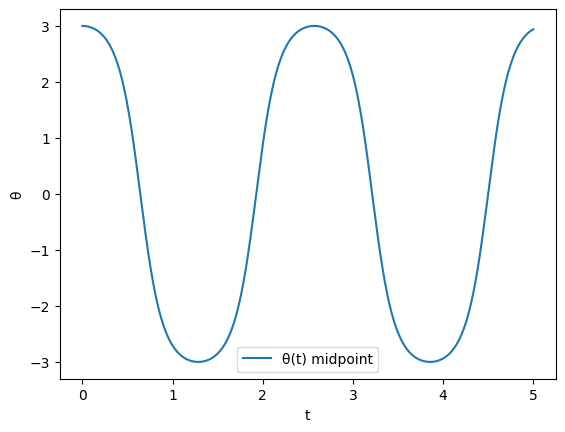

In [20]:
### Code for Part (a) (keep this comment here) ###
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions
theta0 = 3
t0, tf = 0, 5
ω = 2 * np.pi

#function f
def f(t, θ):
    θ_1, θ_2 = θ
    return np.array([θ_2, -ω ** 2 * np.sin(θ_1)])

# Implement midpoint method
def midpoint(theta0, num, tf):
    t = np.linspace(t0, tf, num + 1)
    h = t[1] - t[0]
    theta = np.zeros((num + 1, 2))
    theta[0] = [theta0, 0.0]  #  θ(0) = theta0, θ'(0) = 0
    for i in range(num):
        ti = t[i]
        yi = theta[i]
        k_1 = f(ti, yi)
        k_2 = f(ti + (h / 2), yi + (h / 2) * k_1)
        theta[i + 1] = yi + h * k_2
    return t, theta[:, 0], theta[:, 1]

# Convergence test
num = 100
t_old, theta_old, theta_prime_old = midpoint(theta0, num, tf)
while True:
    num = 2 * num
    t, theta, theta_prime = midpoint(theta0, num, tf)
    converged = np.allclose(theta[::2], theta_old, atol=1e-2, rtol=1e-2) and \
                np.allclose(theta_prime[::2], theta_prime_old, atol=1e-2, rtol=1e-2)
    if converged:
        break
    t_old, theta_old, theta_prime_old = t, theta, theta_prime
print('Took %d steps to converge' % num)

# Update with converged solutions
t_midpoint = t
theta_midpoint = theta
theta_prime_midpoint = theta_prime

# Plot θ as a function of t
plt.plot(t_midpoint, theta_midpoint, label="θ(t) midpoint")
plt.xlabel('t')
plt.ylabel("θ")
plt.legend()
plt.show()

## <font color=#46769B>Part (b)</font>

Repeat the steps of Part (a) with Heun's method.

- Define a function `heun(theta0,num)` (using a `def` statement) that implements __Heun's method__ for a given initial displacement `theta0`, number of steps `num`, and final time `tf`.

Your function should take the structure
```py
def heun(theta0,num,tf):
    # your code here
    return t, theta, theta_prime
```
that is, returning the time points `t`, and numerical values for $\theta,\theta^\prime$ at the time points. Take the interval $[0,5]$ for $t$ and the initial condition $\theta(0) = \theta_0 = 3$ and $\theta^\prime(0) = 0$.

- Repeat the convergence test of Part (a): starting with $N=100$ steps, perform a convergence test to determine the number of steps required for Heun's method to converge, with the same inputs.

- Assign your final converged numerical solutions for $\theta,\theta^\prime$, as well as the list of $t$ points, to the variables `theta_heun`, `theta_prime_heun`, and `t_heun`, respectively.

- Lastly, from your converged numerical solutions, make a plot of $\theta$ as a function of $t$. Include axes labels in your plot.

Heun converged at 3200 steps


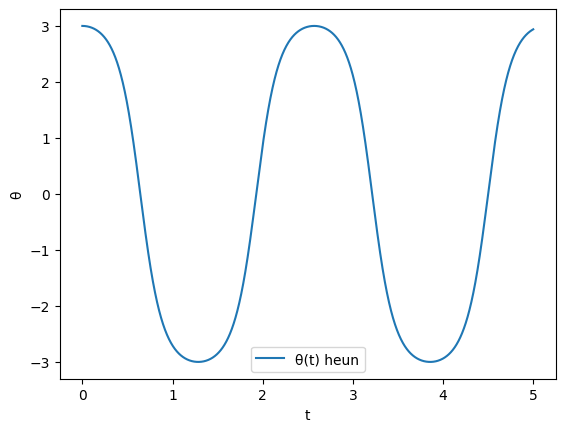

In [21]:
### Code for Part (b) (keep this comment here) ###
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions
theta0 = 3
theta_prime0 = 0
t0, tf = 0, 5
ω = 2 * np.pi

def f(t, θ):
    θ_1, θ_2 = θ
    return np.array([θ_2, -ω ** 2 * np.sin(θ_1)])

# Implement Heun's method
def heun(theta0, num, tf):
    t = np.linspace(t0, tf, num + 1)
    h = t[1] - t[0]
    theta = np.zeros((num + 1, 2))
    theta[0] = [theta0, theta_prime0]
    for i in range(num):
        ti = t[i]
        yi = theta[i]
        k1 = f(ti, yi)
        k2 = f(ti + h, yi + h * k1)
        k = 0.5 * (k1 + k2)  # Average slope for Heun's method
        theta[i + 1] = yi + h * k
    return t, theta[:, 0], theta[:, 1]

# Convergence test
num = 100
t_old, theta_old, theta_prime_old = heun(theta0, num, tf)
while True:
    num = 2 * num
    t, theta_new, theta_prime_new = heun(theta0, num, tf)
    converged = np.allclose(theta_new[::2], theta_old, atol=1e-2, rtol=1e-2) and \
                np.allclose(theta_prime_new[::2], theta_prime_old, atol=1e-2, rtol=1e-2)
    if converged:
        break
    t_old, theta_old, theta_prime_old = t, theta_new, theta_prime_new
print("Heun converged at %d steps" % num)

# Assign converged solutions
t_heun = t
theta_heun = theta_new
theta_prime_heun = theta_prime_new

# Plot θ as a function of t
plt.plot(t_heun, theta_heun, label="θ(t) heun")
plt.xlabel('t')
plt.ylabel("θ")
plt.legend()
plt.show()

## <font color=#46769B>Part (c)</font>

Repeat the steps of Parts (a) and (b) with the (classic) RK4 method.

- Define a function `rk4(theta0,num,tf)` (using a `def` statement) that implements the classic __RK4 method__ for a given initial displacement `theta0`, number of steps `num`, and final time `tf`.

Your function should take the structure
```py
def rk4(theta0,num,tf):
    # your code here
    return t, theta, theta_prime
```
that is, returning the time points `t`, and numerical values for $\theta,\theta^\prime$ at the time points. Take the time interval $[0,5]$ for $t$ and the initial condition $\theta(0) = \theta_0 = 3$ and $\theta^\prime(0) = 0$.

- Repeat the convergence test of Parts (a) and (b): starting with $N=100$ steps, perform a convergence test to determine the number of steps required for the RK4 method to converge, with the same inputs.

- Assign your final converged numerical solutions for $\theta,\theta^\prime$, as well as the list of $t$ points, to the variables `theta_rk4`, `theta_prime_rk4`, and `t_rk4`, respectively.

- Lastly, from your converged numerical solutions, make a plot of $\theta$ as a function of $t$. Include axes labels in your plot.

RK4 converged at 400 steps


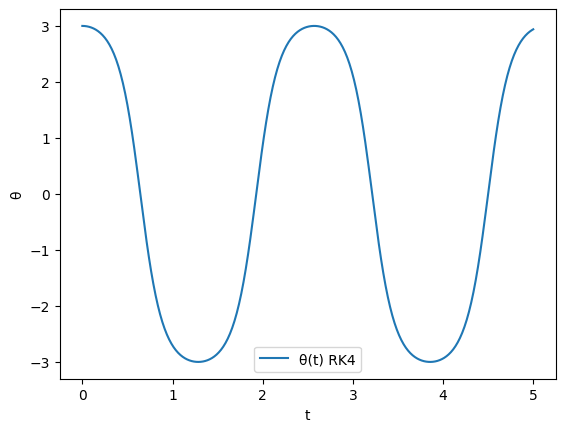

In [23]:
### Code for Part (c) (keep this comment here) ###
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions
theta0 = 3
theta_prime0 = 0
t0, tf = 0, 5
ω = 2 * np.pi

def f(t, θ):
    θ1, θ2 = θ
    return np.array([θ2, -ω**2 * np.sin(θ1)])

# Implement the classic RK4 method
def rk4(theta0, num, tf):
    t = np.linspace(t0, tf, num + 1)
    h = t[1] - t[0]
    theta = np.zeros((num + 1, 2))
    theta[0] = [theta0, theta_prime0]  # θ(0)=theta0, θ'(0)=0
    for i in range(num):
        ti = t[i]
        yi = theta[i]
        k1 = f(ti, yi)
        k2 = f(ti + 0.5*h, yi + 0.5*h*k1)
        k3 = f(ti + 0.5*h, yi + 0.5*h*k2)
        k4 = f(ti + h,    yi + h*k3)
        theta[i + 1] = yi + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    return t, theta[:, 0], theta[:, 1]

# Convergence test
num = 100
t_old, theta_old, theta_prime_old = rk4(theta0, num, tf)
while True:
    num *= 2
    t_new, theta_new, theta_prime_new = rk4(theta0, num, tf)
    converged = (np.allclose(theta_new[::2],        theta_old,        atol=1e-2, rtol=1e-2) and
                 np.allclose(theta_prime_new[::2], theta_prime_old,  atol=1e-2, rtol=1e-2))
    if converged:
        break
    t_old, theta_old, theta_prime_old = t_new, theta_new, theta_prime_new

print(f"RK4 converged at {num} steps")

# Final converged solution
t_rk4 = t_new
theta_rk4 = theta_new
theta_prime_rk4 = theta_prime_new

# Plot θ as a function of t
plt.plot(t_rk4, theta_rk4, label="θ(t) RK4")
plt.xlabel('t')
plt.ylabel('θ')
plt.legend()
plt.show()


## <font color=#46769B>Part (d)</font>

One of the drawbacks of Runge-Kutta methods is that conservation laws, such as energy or angular momentum conservation, are not exact but only hold at a given level of numerical accuracy, depending on the step size $h$ and the order of the method. That is, the local error incurred with each time step also incurs a violation of conservation laws, which grows with each time step.

In this problem, we will see how the energy of a pendulum, which we expect to be constant, is in fact not constant in time.

First, let's clarify what the energy $E$ is here. Note that the kinetic energy of the pendulum is

$$T = \frac{1}{2} m v^2 = \frac{1}{2} m \ell^2 {\theta'}^2 \, $$

where $\ell$ is the length of the pendulum arm and $m$ is the mass of the bob. The potential energy of the pendulum is

$$U = m g h = m g \ell(1-\cos\theta) = m \ell^2 \omega^2 (1-\cos\theta) \, .$$

Since we don't care about the overall factor of $m \ell^2$, let's set $m\ell^2 = 1$. Therefore the energy is

$$E = T + U = \frac{1}{2} {\theta^\prime}^2 + \omega^2 (1- \cos\theta) \, .$$

Note that the expected exact energy $E_{\rm exact}$ can be calculated by evaluating $E$ at the initial condition. Since energy should be conserved, this is the expected energy at all times.

Your tasks are as follows:

- Using your functions defined in Parts (a)-(c), solve Eq. (1) for the initial condition $\theta(0) = 1$ and $\theta^\prime(0) = 0$, for the time interval $[0,1000]$ and a step-size $h=0.01$, using Euler's method (also known as RK1), the midpoint method and Heun's method (RK2 methods), and classic RK4.

- Define the corresponding outputs of the functions to be:

    - `t_euler`, `theta_euler`, `theta_prime_euler`

    - `t_midpoint`, `theta_midpoint`, `theta_prime_midpoint`

    - `t_heun`, `theta_heun`, `theta_prime_heun`

    - `t_rk4`, `theta_rk4`, `theta_prime_rk4`

- For each of your solutions, calculate the absolute energy difference $\Delta E = |E - E_{\rm exact}|$ as a function of time $t$. Assign your results to the variables `Delta_E_euler`, `Delta_E_midpoint`, `Delta_E_heun`, `Delta_E_rk4`, respectively. Note that your result for each should be an array of the same length as the number of time points.

- Make a log-log plot of the absolute energy differences vs $t$ for all four methods on a single plot. Include axis labels and a legend.




In [ ]:
### Code for Part (d) (keep this comment here) ###
